**Team Id**:PNT2022TMID29441

In [ ]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten, MaxPooling2D, Dropout
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


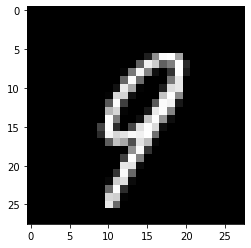

9


In [ ]:
plt.imshow(X_train[22], cmap="gray")
plt.show()
print (y_train[22])

In [ ]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [ ]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000,)


In [ ]:
#one hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model = Sequential()

## Declare the layers
layer_1 = Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1))
layer_2 = MaxPooling2D(pool_size=2)
layer_3 = Conv2D(32, kernel_size=3, activation='relu')
layer_4 = MaxPooling2D(pool_size=2)
layer_5 = Dropout(0.5)
layer_6 = Flatten()
layer_7 = Dense(128, activation="relu")
layer_8 = Dropout(0.5)
layer_9 = Dense(10, activation='softmax')

## Add the layers to the model
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)
model.add(layer_5)
model.add(layer_6)
model.add(layer_7)
model.add(layer_8)
model.add(layer_9)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 115s 61ms/step - loss: 0.8415 - accuracy: 0.7722 - val_loss: 0.1304 - val_accuracy: 0.9606
Epoch 2/3
1875/1875 [==============================] - 103s 55ms/step - loss: 0.2855 - accuracy: 0.9150 - val_loss: 0.0809 - val_accuracy: 0.9773
Epoch 3/3
1875/1875 [==============================] - 107s 57ms/step - loss: 0.2165 - accuracy: 0.9367 - val_loss: 0.0629 - val_accuracy: 0.9798


1/1 [==============================] - 0s 27ms/step
Prediction (Softmax) from the neural network:

 [[3.3391341e-06 9.5529492e-07 4.2020744e-08 1.2607078e-06 4.2283759e-04
  5.2712892e-07 9.5205466e-10 8.1349153e-04 6.0083810e-04 9.9815661e-01]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


--------- Prediction --------- 




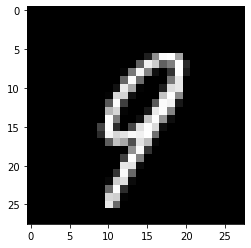



Final Output: 9


In [ ]:
example = X_train[22]
prediction = model.predict(example.reshape(1, 28, 28, 1))
print ("Prediction (Softmax) from the neural network:\n\n {}".format(prediction))
hard_maxed_prediction = np.zeros(prediction.shape)
hard_maxed_prediction[0][np.argmax(prediction)] = 1
print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))

print ("\n\n--------- Prediction --------- \n\n")
plt.imshow(example.reshape(28, 28), cmap="gray")
plt.show()
print("\n\nFinal Output: {}".format(np.argmax(prediction)))

In [ ]:
metrices=model.evaluate(X_test,y_test,verbose=1)
print("Metrices(test loss and Test Accuracy):")
print(metrices)

313/313 [==============================] - 5s 16ms/step - loss: 0.0629 - accuracy: 0.9798
Metrices(test loss and Test Accuracy):
[0.06292153894901276, 0.9797999858856201]





----------------Contoured Image--------------------


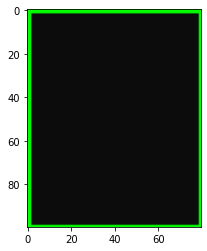

In [ ]:
image = cv2.imread('test_image.jpg')
image = np.full((100,80,3), 12, dtype = np.uint8)
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
contours,hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []

for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)

print("\n\n\n----------------Contoured Image--------------------")
import os, types
import pandas as pd

def __iter__(self): return 0

print=("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)